In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Spoof User-Agent to avoid getting blocked
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
}

# Number of pages to scrape
num_pages = 10 

# Base URL (Amazon paginates results using '&page=2', '&page=3', etc.)
base_url = "https://www.amazon.in/s?k=smartphones&page={}"

# List to store extracted data
all_data = []

# Loop through multiple pages
for page in range(1, num_pages + 1):
    url = base_url.format(page)
    print(f"📄 Fetching Page {page}...")

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        print(f"✅ Successfully fetched page {page}")

        # Find all product listings
        products = soup.find_all("div", {"data-component-type": "s-search-result"})

        # Extract data
        for product in products:
            # Extract product name
            name_tag = product.find("span", class_="a-size-medium a-color-base a-text-normal")
            if not name_tag:  # Fallback selector
                name_tag = product.find("h2")

            # Extract price
            price_tag = product.find("span", class_="a-price-whole")

            # Extract rating
            rating_tag = product.find("span", class_="a-icon-alt")

            # Extract product link
            link_tag = product.find("a", class_="a-link-normal s-no-outline")

            # Skip if product name or link is missing
            if not name_tag or not link_tag or "sspa/click" in link_tag["href"]:
                continue

            # Store extracted values
            product_name = name_tag.text.strip() if name_tag else "N/A"
            product_price = price_tag.text.strip().replace(",", "") if price_tag else "N/A"
            product_rating = rating_tag.text.split()[0] if rating_tag else "N/A"
            product_link = "https://www.amazon.in" + link_tag["href"]

            # Append to list
            all_data.append({
                "Product Name": product_name,
                "Price (₹)": product_price,
                "Rating": product_rating,
                "Link": product_link
            })

        # Pause to avoid being blocked
        time.sleep(2)

    else:
        print(f"❌ Failed to fetch page {page}. Status Code:", response.status_code)

# Convert to DataFrame
df = pd.DataFrame(all_data)

# Convert price to numeric format (ignore non-numeric values)
df["Price (₹)"] = pd.to_numeric(df["Price (₹)"], errors="coerce")

# Convert rating to float
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Save to CSV
df.to_csv("amazon_smartphones.csv", index=False)
print(f"✅ Data saved successfully with {len(df)} entries!")

# Print dataset stats
print("\n📌 Top 10 Most Expensive Smartphones:")
print(df.nlargest(10, "Price (₹)")[["Product Name", "Price (₹)", "Rating", "Link"]])

print(f"\n📌 Average Smartphone Price: ₹ {df['Price (₹)'].mean():.2f}")
print(f"\n📌 Average Smartphone Rating: {df['Rating'].mean():.2f}")

# Extract brand names (first word of product name)
df["Brand"] = df["Product Name"].str.split().str[0]

# Find most common brands
brand_counts = df["Brand"].value_counts().head(5)
print("\n📌 Top 5 Most Common Brands:\n", brand_counts)


**Data Analysis

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("amazon_smartphones.csv")

# Display first 5 rows
print(df.head())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)


                                        Product Name  Price (₹)  Rating  \
0  iQOO Z7 Pro 5G (Blue Lagoon, 8GB RAM, 256GB St...    19499.0     4.4   
1  Samsung Galaxy A26 5G (Awesome Black, 8GB, 128...    24999.0     4.0   
2  Samsung Galaxy S24 FE 5G AI Smartphone (Graphi...    40060.0     4.3   
3  Samsung Galaxy S24 Ultra 5G AI Smartphone (Tit...    91800.0     4.0   
4  Motorola G45 5G (Brilliant Blue, 8GB RAM, 128G...    11689.0     4.1   

                                                Link  
0  https://www.amazon.in/iQOO-MediaTek-Dimesity-P...  
1  https://www.amazon.in/Samsung-Galaxy-Awesome-B...  
2  https://www.amazon.in/Samsung-Galaxy-Smartphon...  
3  https://www.amazon.in/Samsung-Galaxy-Smartphon...  
4  https://www.amazon.in/Motorola-Brilliant-Blue-...  

Missing Values:
 Product Name     0
Price (₹)        0
Rating          11
Link             0
dtype: int64

Data Types:
 Product Name     object
Price (₹)       float64
Rating          float64
Link             object
dt

CLEANING AND PROCESSING DATA

In [5]:
# Convert price column (remove commas and convert to int)
df["Price (₹)"] = df["Price (₹)"].astype(str).str.replace(",", "").astype(float)

# Fill missing values
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())  # Replace missing ratings with average
df["Product Name"] = df["Product Name"].fillna("Unknown")  # Fill missing names

print("\nCleaned Data:\n", df.head())



Cleaned Data:
                                         Product Name  Price (₹)  Rating  \
0  iQOO Z7 Pro 5G (Blue Lagoon, 8GB RAM, 256GB St...    19499.0     4.4   
1  Samsung Galaxy A26 5G (Awesome Black, 8GB, 128...    24999.0     4.0   
2  Samsung Galaxy S24 FE 5G AI Smartphone (Graphi...    40060.0     4.3   
3  Samsung Galaxy S24 Ultra 5G AI Smartphone (Tit...    91800.0     4.0   
4  Motorola G45 5G (Brilliant Blue, 8GB RAM, 128G...    11689.0     4.1   

                                                Link  
0  https://www.amazon.in/iQOO-MediaTek-Dimesity-P...  
1  https://www.amazon.in/Samsung-Galaxy-Awesome-B...  
2  https://www.amazon.in/Samsung-Galaxy-Smartphon...  
3  https://www.amazon.in/Samsung-Galaxy-Smartphon...  
4  https://www.amazon.in/Motorola-Brilliant-Blue-...  


FINDING INSIGHTS

In [6]:
# Most expensive smartphones
top_expensive = df.sort_values(by="Price (₹)", ascending=False).head(10)
print("\n📌 Top 10 Most Expensive Smartphones:\n", top_expensive)

# Average price and rating
print("\n📌 Average Smartphone Price: ₹", round(df["Price (₹)"].mean(), 2))
print("\n📌 Average Smartphone Rating:", round(df["Rating"].mean(), 2))

# Find most common brands
df["Brand"] = df["Product Name"].apply(lambda x: x.split()[0])  # Extract brand name
top_brands = df["Brand"].value_counts().head(5)
print("\n📌 Top 5 Most Common Brands:\n", top_brands)



📌 Top 10 Most Expensive Smartphones:
                                           Product Name  Price (₹)  Rating  \
3    Samsung Galaxy S24 Ultra 5G AI Smartphone (Tit...    91800.0     4.0   
101  Samsung Galaxy S24 Ultra 5G AI Smartphone (Tit...    91800.0     4.0   
82   Tecno Phantom V Fold 2 (Karst Green, 12GB+512G...    89999.0     3.6   
81   OnePlus 13 | Smarter with OnePlus AI (12GB RAM...    69998.0     4.4   
114       iQOO 13 5G (Legend, 16GB RAM, 512GB Storage)    59999.0     4.4   
9    Samsung Galaxy S24 Plus 5G AI Smartphone (Coba...    59089.0     4.1   
137  Samsung Galaxy A56 5G (Awesome Olive, 12GB, 25...    44999.0     2.5   
94   Samsung Galaxy A56 5G (Awesome Olive, 8GB, 256...    41999.0     2.5   
59   Vivo V50 5G (Starry Night, 12GB RAM, 512GB Sto...    40999.0     4.2   
135  Vivo V50 5G (Starry Night, 12GB RAM, 512GB Sto...    40999.0     4.2   

                                                  Link  
3    https://www.amazon.in/Samsung-Galaxy-Smartphon...  

Visualization

C:\Users\MANISH YADAV\AppData\Local\Temp\ipykernel_8060\2979765280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Price (₹)", y="Product Name", data=top_expensive, palette="coolwarm")


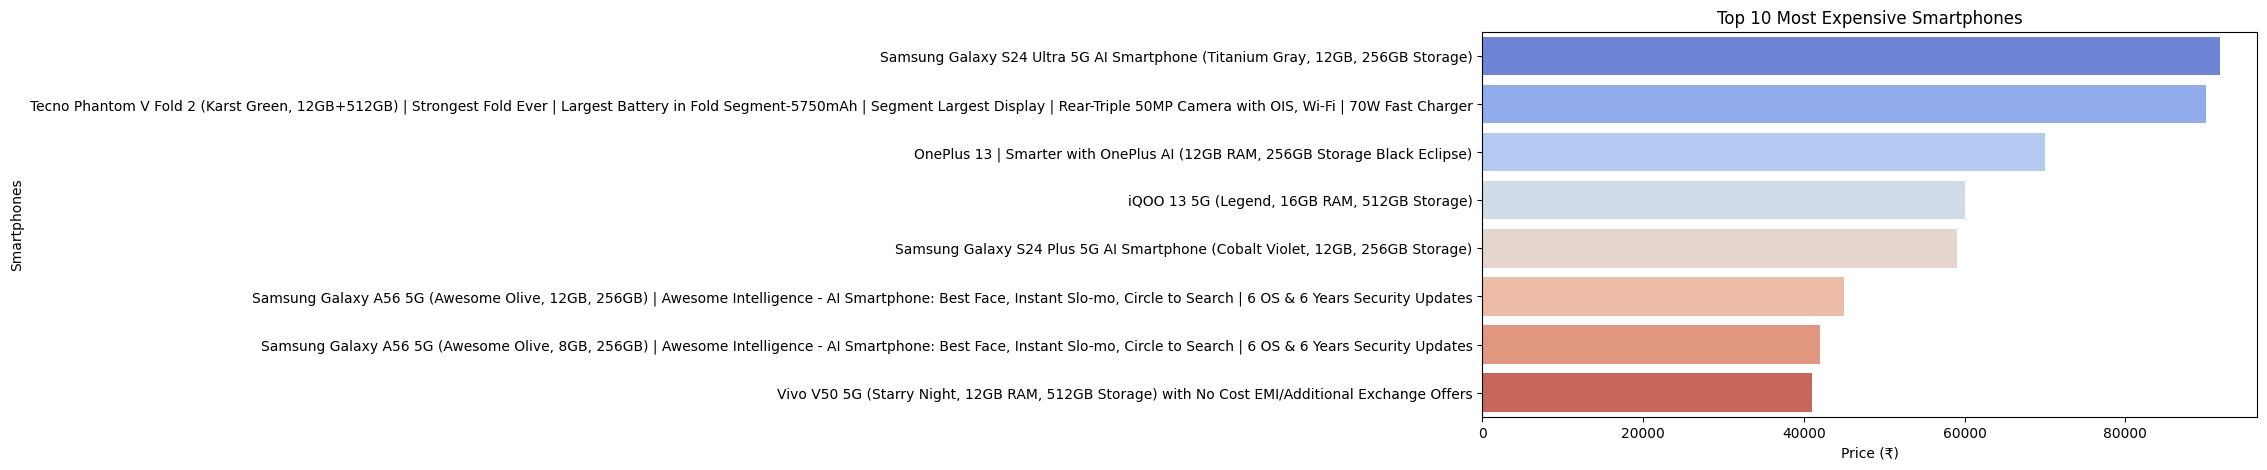

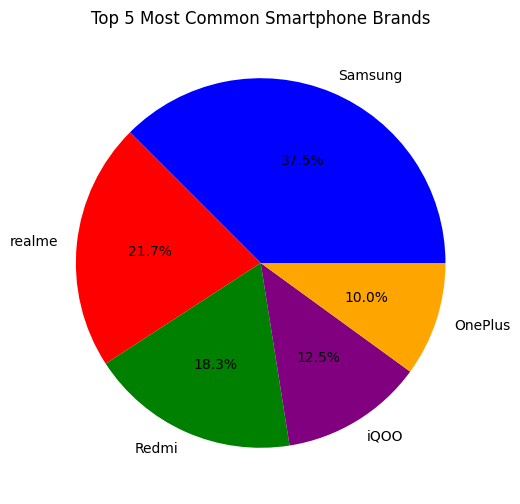

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Expensive Phones Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Price (₹)", y="Product Name", data=top_expensive, palette="coolwarm")
plt.xlabel("Price (₹)")
plt.ylabel("Smartphones")
plt.title("Top 10 Most Expensive Smartphones")
plt.show()

# Top 5 Most Common Brands Pie Chart
plt.figure(figsize=(6, 6))
top_brands.plot(kind="pie", autopct="%1.1f%%", colors=["blue", "red", "green", "purple", "orange"])
plt.title("Top 5 Most Common Smartphone Brands")
plt.ylabel("")
plt.show()
